In [7]:
import numpy as np
from matplotlib import pyplot as plt
from tensorboardX import SummaryWriter

0 2246.2528362490243
1 2200.055964466552
2 2155.4827157551126
3 2112.463642431502
4 2070.9330833272934
5 2030.814707946824
6 1992.0277245478555
7 1954.4693998348698
8 1918.0084490540462
9 1882.7394882552217
10 1848.5691193605119
11 1815.3707638252424
12 1783.2236365682052
13 1752.0926053920284
14 1721.9077631550606
15 1692.6340046728812
16 1664.2547009739646
17 1636.7222598699145
18 1609.9973923969142
19 1584.068470685772
20 1558.9041242344258
21 1534.4754144534757
22 1510.724450735324
23 1487.6078632119224
24 1465.1497975685538
25 1443.3261758228607
26 1422.102437236443
27 1401.4502701408906
28 1381.3748381302212
29 1361.8553971135852
30 1342.864905610175
31 1324.3849227387518
32 1306.3977879766549
33 1288.8865819652074
34 1271.8350896084248
35 1255.226358129636
36 1239.0403651677866
37 1223.2694401596516
38 1207.8998571268282
39 1192.9242032479706
40 1178.3351474150318
41 1164.108676825661
42 1150.2331422843595
43 1136.6973465589315
44 1123.490523676944
45 1110.6021407347582
46 1098.

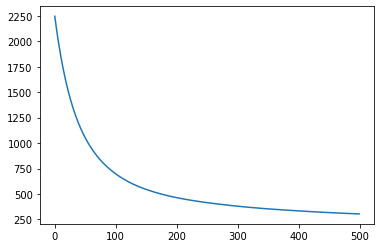

In [2]:
#1.定义网络维度
#N(总共有多少个数据),D_in(输入维度),H(隐藏层维度),D_out(输出维度)
N, D_in, H, D_out = 128, 3, 5, 2
#2.生成输入，输出数据
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)
#3.初始化网络 
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)
#4.训练网络
lr= 1e-5
_loss = []
for t in range(500):
    #前向传播
    h = x.dot(w1) #(N, H)
    h_relu = np.maximum(0, h) #(N, H)
    y_pred = h_relu.dot(w2) #(N, D_out)
    
    #损失
    loss = np.square(y_pred-y).sum()
    _loss.append(loss)
    print(t, loss)
    
    #反向传播
    
    grad_y_pred = 2.0*(y_pred-y) # (N, D_out)
    grad_w2 = h_relu.T.dot(grad_y_pred) #(H, D_out)
    grad_h_relu = grad_y_pred.dot(w2.T) #(N, H)
    grad_h = grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.T.dot(grad_h) #(D_in, H)
    
    w1 -= lr*grad_w1
    w2 -= lr*grad_w2
plt.plot(list(range(len(_loss))), _loss)
plt.show()

0 tensor(910.1866)
1 tensor(895.7950)
2 tensor(881.9147)
3 tensor(868.5221)
4 tensor(855.5954)
5 tensor(843.1141)
6 tensor(831.0604)
7 tensor(819.4120)
8 tensor(808.1515)
9 tensor(797.2617)
10 tensor(786.7267)
11 tensor(776.5314)
12 tensor(766.6613)
13 tensor(757.1027)
14 tensor(747.8424)
15 tensor(738.8683)
16 tensor(730.1686)
17 tensor(721.7318)
18 tensor(713.5476)
19 tensor(705.6057)
20 tensor(697.8965)
21 tensor(690.4107)
22 tensor(683.1396)
23 tensor(676.0750)
24 tensor(669.2086)
25 tensor(662.5330)
26 tensor(656.0408)
27 tensor(649.7168)
28 tensor(643.5515)
29 tensor(637.5504)
30 tensor(631.7077)
31 tensor(626.0176)
32 tensor(620.4744)
33 tensor(615.0728)
34 tensor(609.8078)
35 tensor(604.6746)
36 tensor(599.6683)
37 tensor(594.7847)
38 tensor(590.0195)
39 tensor(585.3685)
40 tensor(580.8278)
41 tensor(576.3938)
42 tensor(572.0627)
43 tensor(567.8312)
44 tensor(563.6958)
45 tensor(559.6536)
46 tensor(555.7014)
47 tensor(551.8362)
48 tensor(548.0552)
49 tensor(544.3558)
50 tensor(

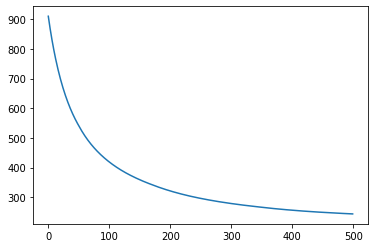

In [3]:
import torch

dtype = torch.float
device = torch.device('cpu')
#device = torch.device('cuda:0')

#1.定义网络维度
#N(总共有多少个数据),D_in(输入维度),H(隐藏层维度),D_out(输出维度)
N, D_in, H, D_out = 128, 3, 5, 2
#2.生成输入，输出数据
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)
#3.初始化网络
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out,device=device, dtype=dtype)
#4.训练网络
lr= 1e-5
_loss = []
for i in range(500):
    #前向传播
    h = x.mm(w1) #(N, H)
    h_relu = h.clamp(min=0) #(N, H)
    y_pred = h_relu.mm(w2) #(N, D_out)
    
    #损失
    loss = (y_pred-y).pow(2).sum()
    _loss.append(loss)
    print(i, loss)
    
    #反向传播
    
    grad_y_pred = 2.0*(y_pred-y) # (N, D_out)
    grad_w2 = h_relu.t().mm(grad_y_pred) #(H, D_out)
    grad_h_relu = grad_y_pred.mm(w2.t()) #(N, H)
    grad_h = grad_h_relu.clone()
    grad_h[h<0] = 0
    grad_w1 = x.t().mm(grad_h) #(D_in, H)
    
    w1 -= lr*grad_w1
    w2 -= lr*grad_w2
plt.plot(list(range(len(_loss))), _loss)
plt.show()

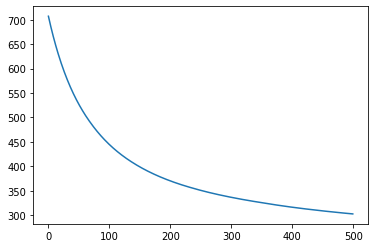

In [8]:
import torch

dtype = torch.float
device = torch.device('cpu')
#device = torch.device('cuda:0')

#1.定义网络维度
#N(总共有多少个数据),D_in(输入维度),H(隐藏层维度),D_out(输出维度)
N, D_in, H, D_out = 128, 3, 5, 2
#2.生成输入，输出数据
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)
#3.初始化网络
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out,device=device, dtype=dtype, requires_grad=True)
#4.训练网络
lr= 1e-5
_loss = []
for i in range(500):
    #前向传播
    h = x.mm(w1) #(N, H)
    h_relu = h.clamp(min=0) #(N, H)
    y_pred = h_relu.mm(w2) #(N, D_out)
    
    #损失
    loss = (y_pred-y).pow(2).sum()
    
    
    #反向传播
    #w1.grad
    loss.backward()
    _loss.append(loss.item())
    with torch.no_grad():
        w1 -= lr*w1.grad
        w2 -= lr*w2.grad
        
        w1.grad.zero_()
        w2.grad.zero_()
plt.plot(list(range(len(_loss))), _loss)
plt.show()

In [9]:
SummaryWriter()

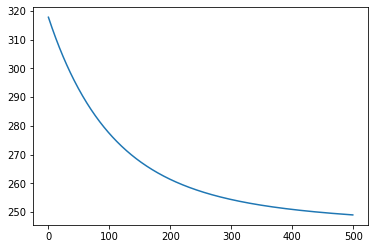

In [5]:
import torch

dtype = torch.float
device = torch.device('cpu')
#device = torch.device('cuda:0')

#1.定义网络维度
#N(总共有多少个数据),D_in(输入维度),H(隐藏层维度),D_out(输出维度)
N, D_in, H, D_out = 128, 3, 5, 2
#2.生成输入，输出数据
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)
#3.初始化网络
#w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
#w2 = torch.randn(H, D_out,device=device, dtype=dtype, requires_grad=True)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),#全连接层
    torch.nn.ReLU(),
    torch.nn.Linear( H, D_out),
)

#4.训练网络
lr = 1e-5
_loss = []
for i in range(500):
    #前向传播
    
    y_pred = model(x) #(N, D_out)
    
    #损失
    loss = (y_pred-y).pow(2).sum()
    
    model.zero_grad()#参数梯度清零
    #反向传播
    #w1.grad
    loss.backward()
    _loss.append(loss.item())
    with torch.no_grad():
        for param in model.parameters():
            param -= lr*param.grad
    

plt.plot(list(range(len(_loss))), _loss)
plt.show()

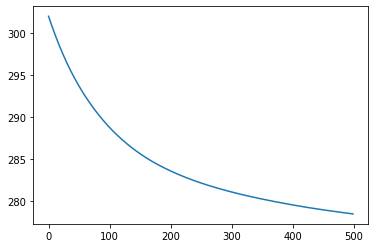

In [11]:
class MyNet(torch.nn.Module):
    def __init__(self, D_in, D_out, H):
        super(MyNet, self).__init__()#父类初始化
        self.fc1 = torch.nn.Linear(D_in, H)
        self.fc2 = torch.nn.Linear(H, D_out)
    def forward(self, x):
        h = self.fc1(x)
        h_relu = torch.relu(h)
        y_pred = self.fc2(h_relu)
        return y_pred

dtype = torch.float
device = torch.device('cpu')
#device = torch.device('cuda:0')

#1.定义网络维度
#N(总共有多少个数据),D_in(输入维度),H(隐藏层维度),D_out(输出维度)
N, D_in, H, D_out = 128, 3, 5, 2
#2.生成输入，输出数据
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)
#3.初始化网络
#w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
#w2 = torch.randn(H, D_out,device=device, dtype=dtype, requires_grad=True)

model = MyNet(D_in, D_out, H)

#4.创建优化器
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
writer = SummaryWriter()

#5.训练网络
lr = 1e-5
_loss = []
for epoch in range(500):
    #前向传播
    writer.add_scalar('scalar/test', np.random.rand(), epoch)
    writer.add_scalars('scalar/scalars_test', {'xsinx':epoch*np.sin(epoch), 'xcosx': epoch*np.cos(epoch)}, epoch)
    y_pred = model(x) #(N, D_out)
    
    #损失
    loss = loss_fn(y_pred, y)
    
    optimizer.zero_grad()#参数梯度清零
    #反向传播
    #w1.grad
    loss.backward()
    _loss.append(loss.item())
    
    #更新梯度
    optimizer.step()
    

plt.plot(list(range(len(_loss))), _loss)
plt.show()
writer.close()